In [1]:
import pandas as pd

In [2]:
headers = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
data = pd.read_csv('data.csv', names=headers)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

In [4]:
col = data.columns 
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
Y = data.diagnosis                         
list = ['id','diagnosis']
X = data.drop(list,axis = 1 )
X.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

In [7]:
def Y_class(Y):
  if Y == 'B':
    return 0
  elif Y == 'M':
    return 1
actual_value = Y
category = actual_value.map(Y_class) 
Y_class = category

In [8]:
from sklearn.model_selection import train_test_split
X_t, X_test, Y_t, Y_test = train_test_split(X, Y_class, test_size=0.05, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_t, Y_t, test_size=0.05, random_state=42)

In [9]:
C_list = []
i = 0.0001
for count in range(25):
    C_list.append(i)
    i = round(i+0.001,4)

In [10]:
def AUC_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for C in C_list:

        clf = LogisticRegression(C=C,penalty="l2")
        clf.fit(X_train, Y_train)
                # predict the response
        probs_train = clf.predict_proba(X_train)
        preds_train = probs_train[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
 
        probs_cv = clf.predict_proba(X_cv)
        preds_cv = probs_cv[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, preds_cv)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
    
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 
    plt.plot(C_list,auc_train,label="Train Data")
   
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

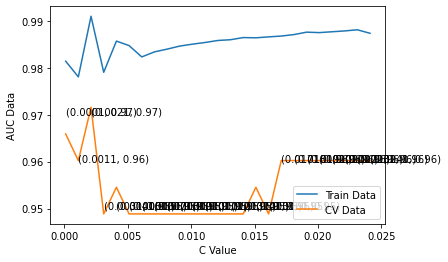

Train_Accuracy  CV_Accuracy
0.0001        0.981408     0.965909
0.0011        0.978067     0.960227
0.0021        0.990989     0.971591
0.0031        0.979045     0.948864
0.0041        0.985693     0.954545
0.0051        0.984732     0.948864
0.0061        0.982320     0.948864
0.0071        0.983396     0.948864
0.0081        0.983982     0.948864
0.0091        0.984634     0.948864
0.0101        0.985042     0.948864
0.0111        0.985400     0.948864
0.0121        0.985824     0.948864
0.0131        0.985987     0.948864
0.0141        0.986443     0.948864
0.0151        0.986394     0.954545
0.0161        0.986590     0.948864
0.0171        0.986769     0.960227
0.0181        0.987078     0.960227
0.0191        0.987600     0.960227
0.0201        0.987502     0.960227
0.0211        0.987681     0.960227
0.0221        0.987861     0.960227
0.0231        0.988105     0.960227
0.0241        0.987355     0.960227

In [11]:
AUC_curve(X_train, Y_train, X_val, Y_val)

In [12]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = LogisticRegression(C=C,penalty="l2")
    clf.fit(X_train, Y_train)

    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

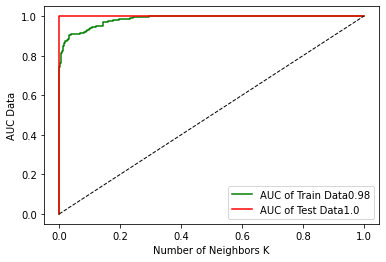

In [13]:
clf, y_pred, y_train_pred = final_Model(0.0091,X_train, Y_train, X_test, Y_test)

In [14]:
import itertools
def plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[314   9]
 [ 23 167]]
Normalized confusion matrix
[[0.97 0.03]
 [0.12 0.88]]


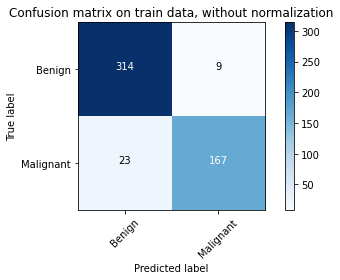

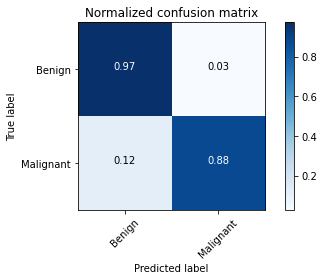

In [15]:
cnf_matrix = confusion_matrix(Y_train, y_train_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data')
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title=' Confusion matrix')

plt.show()

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [39]:
def AUC_svm_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for alpha in C_list:
        clf = SGDClassifier(alpha=alpha,penalty="l2", loss="hinge")
        clf.fit(X_train, Y_train)
        preds_train = clf.predict(X_train)
        clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
        clf_sigmoid.fit(X_train, Y_train)
        prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
        preds_cv = clf.predict(X_cv)
        prob_cv_sigmoid = clf_sigmoid.predict_proba(X_cv)[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, prob_cv_sigmoid)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 

    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 
 
    plt.plot(C_list,auc_train,label="Train Data")
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.xlabel('Value of Alpha')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

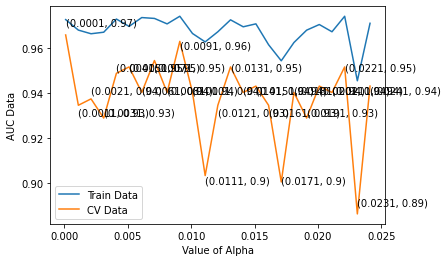

Train_Accuracy  CV_Accuracy
0.0001        0.972739     0.965909
0.0011        0.968071     0.934659
0.0021        0.966449     0.937500
0.0031        0.967134     0.928977
0.0041        0.972984     0.948864
0.0051        0.969716     0.951705
0.0061        0.973643     0.940341
0.0071        0.973261     0.954545
0.0081        0.970833     0.940341
0.0091        0.974230     0.963068
0.0101        0.966563     0.940341
0.0111        0.962832     0.903409
0.0121        0.967329     0.934659
0.0131        0.972633     0.951705
0.0141        0.969537     0.940341
0.0151        0.970849     0.943182
0.0161        0.961577     0.934659
0.0171        0.954432     0.900568
0.0181        0.962547     0.940341
0.0191        0.968038     0.928977
0.0201        0.970547     0.943182
0.0211        0.967329     0.940341
0.0221        0.974222     0.951705
0.0231        0.945543     0.886364
0.0241        0.971102     0.943182

In [40]:
AUC_svm_curve(X_train, Y_train, X_val, Y_val)

In [41]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = SGDClassifier(alpha=C,penalty="l2", loss="hinge")
    clf.fit(X_train, Y_train)
    preds_train = clf.predict(X_train)

    clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
    clf_sigmoid.fit(X_train, Y_train)

    prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
    auc_train = metrics.auc(fpr_train, tpr_train)

    preds_test = clf.predict(X_test)
    prob_test_sigmoid = clf_sigmoid.predict_proba(X_test)[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, prob_test_sigmoid)
    auc_test = metrics.auc(fpr_test, tpr_test)

    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, preds_test, preds_train

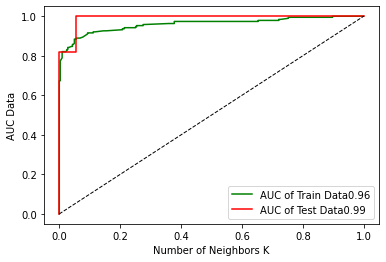

In [42]:
clf, y_pred, y_train_pred = final_Model(0.0141,X_train, Y_train, X_test, Y_test)

Confusion matrix, without normalization
[[17  1]
 [ 0 11]]
Normalized confusion matrix
[[0.94 0.06]
 [0.   1.  ]]


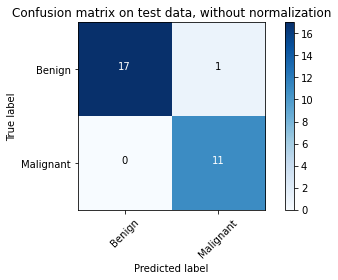

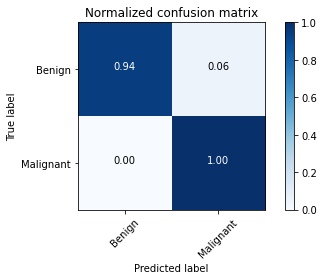

In [44]:
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [56]:
max_depth = [1,5,10,50,500,1000]
n_estimators = [5,10,100,500]

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [58]:
def AUC_curve_rf(X_train,Y_train,X_val, Y_val,max_depth,n_estimators):
    AUC_Train = np.zeros((len(max_depth), len(n_estimators)))
    AUC_CV = np.zeros((len(max_depth), len(n_estimators)))
    for depth in range(len(max_depth)):
        for estimators in range(len(n_estimators)):
            clf = RandomForestClassifier(max_depth=max_depth[depth], n_estimators=n_estimators[estimators])
            clf.fit(X_train, Y_train)

            probs_train = clf.predict_proba(X_train)
            preds_train = probs_train[:,1]
            fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)

            probs_cv = clf.predict_proba(X_val)
            preds_cv = probs_cv[:,1]
            fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_val, preds_cv)
            
            AUC_Train[depth][estimators] = metrics.auc(fpr_train, tpr_train)
            AUC_CV[depth][estimators] = metrics.auc(fpr_cv, tpr_cv)
    return AUC_Train, AUC_CV

In [59]:
def plot_graph(AUC_train, AUC_cv):
    df_train = pd.DataFrame(AUC_train, columns = n_estimators,index = max_depth)
    df_cv = pd.DataFrame(AUC_cv, columns = n_estimators,index = max_depth)
    sns.heatmap(df_train, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on Train data")
    plt.show()
    sns.heatmap(df_cv, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on CV data")
    plt.show()

In [60]:
def final_Model_rf(X_train,Y_train,X_test,Y_test,max_depth,n_estimators):
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
    clf.fit(X_train, Y_train)
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return clf, y_pred, y_train_pred

In [61]:
AUC_train, AUC_cv = AUC_curve_rf(X_train,Y_train,X_val, Y_val,max_depth,n_estimators)

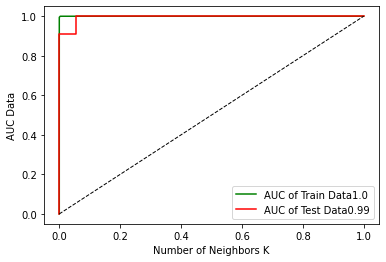

In [63]:
clf, y_pred, y_train_pred = final_Model_rf(X_train, Y_train, X_test, Y_test,1000,10)

Confusion matrix, without normalization
[[323   0]
 [  2 188]]
Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


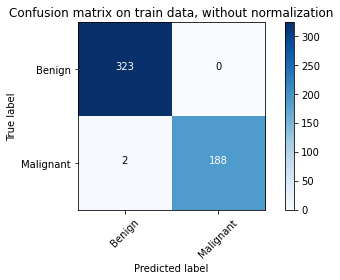

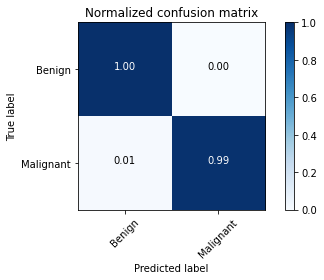

In [64]:
cnf_matrix = confusion_matrix(Y_train, y_train_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


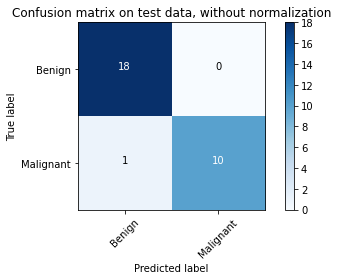

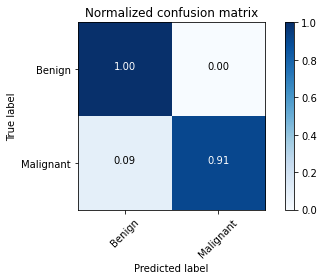

In [65]:
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [69]:
import pydotplus
from sklearn.tree import export_graphviz
def decision_trees_save(clf, iteration, feature_names, target_names):
    file_name = "cancer_"+str(iteration)+".png"
    dot_data = export_graphviz(clf, out_file = None,feature_names=feature_names, class_names = target_names)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)

In [70]:
for i in range(len(clf.estimators_)):
    decision_trees_save(clf.estimators_[i], i, X.columns, ['Benign', 'Malignant'])

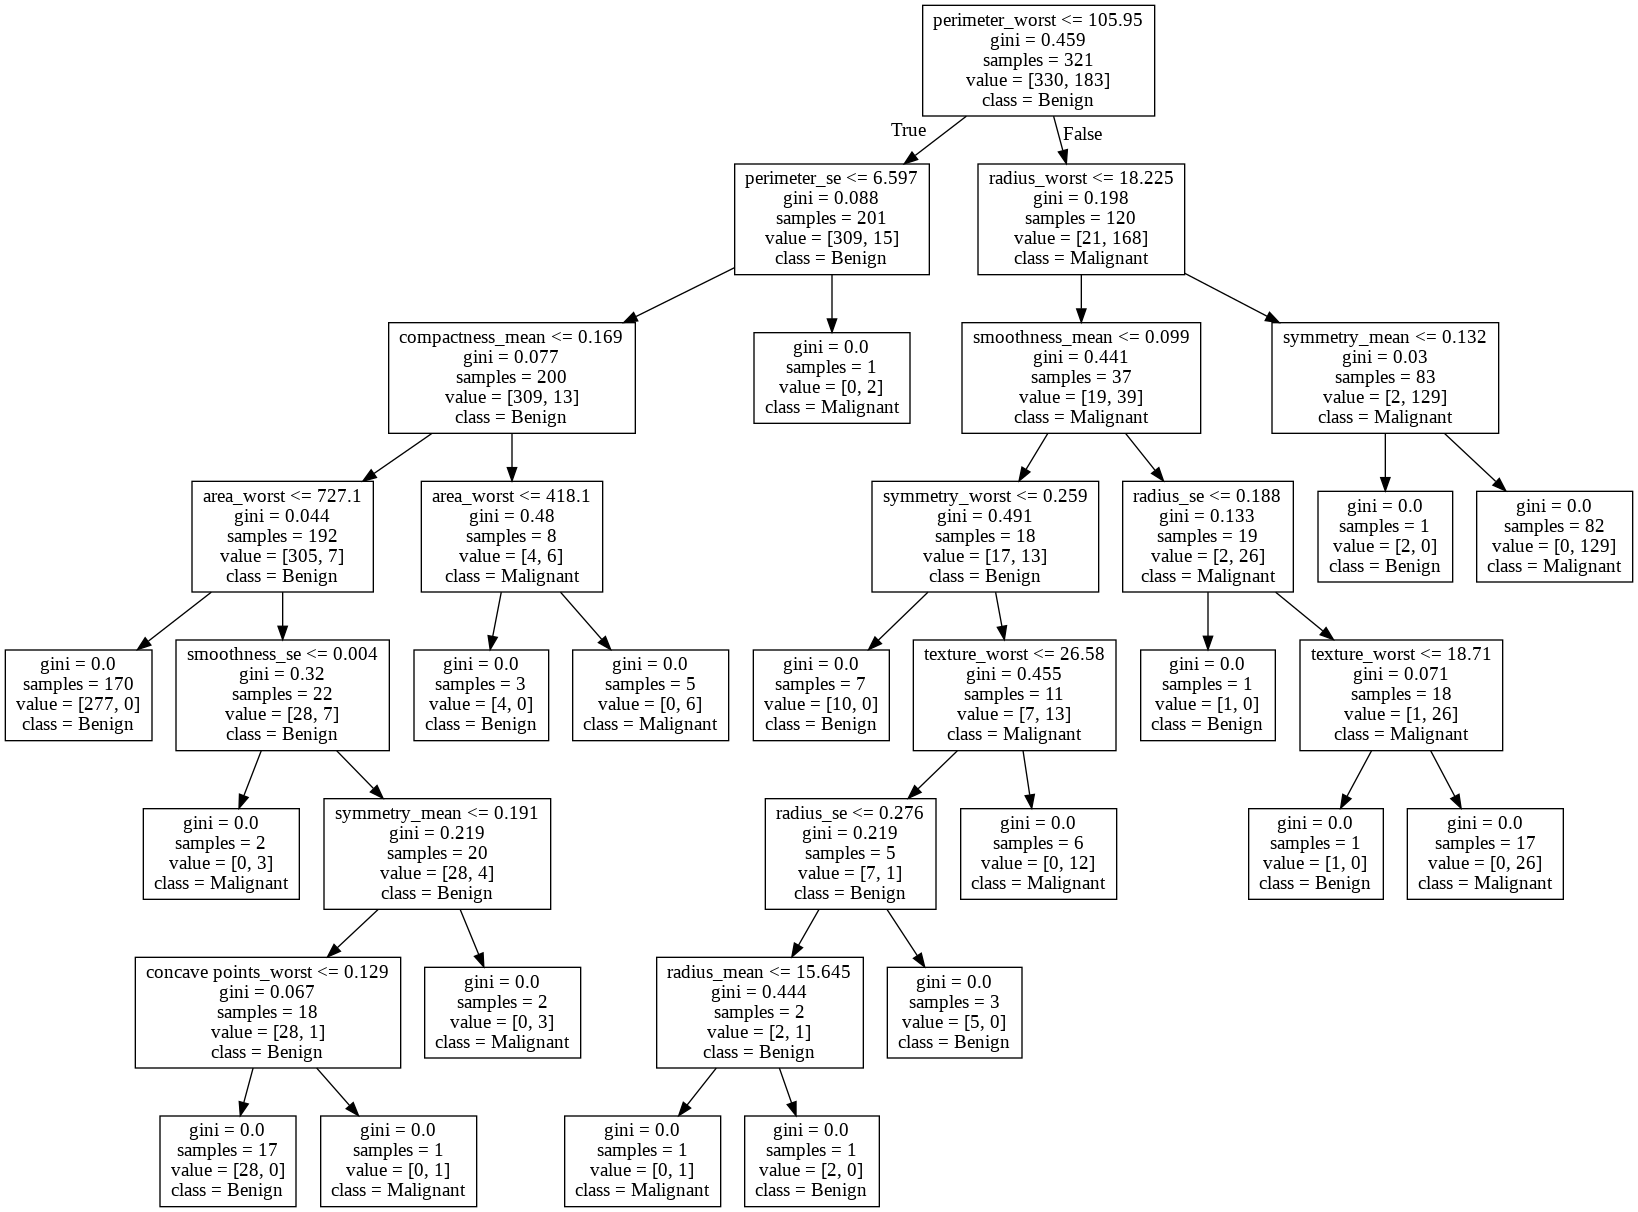

In [71]:
from PIL import Image
image = Image.open("cancer_0.png")
image

In [81]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.title = 'Models Result : '
x.field_names = ["Model", "Train AUC performance", "Test AUC Performance"]

x.add_row(["Logistic Regression", "99 %","99 %"])
x.add_row(["SVM", "91 %","99 %"])
x.add_row(["RandomForestClassfier", "100 %","98 %"])

print(x)

+----------------------------------------------------------------------+
|                           Models Result :                            |
+-----------------------+-----------------------+----------------------+
|         Model         | Train AUC performance | Test AUC Performance |
+-----------------------+-----------------------+----------------------+
|  Logistic Regression  |          99 %         |         99 %         |
|          SVM          |          91 %         |         99 %         |
| RandomForestClassfier |         100 %         |         98 %         |
+-----------------------+-----------------------+----------------------+
